# Задача поддержания связанной структуры спутников

## Модель

Решается задача поддержания структуры 4 КА (спутников) в форме правильного тетраэдра на орбите в гравитационном поле Земли с учётом второй гармоники геопотенциала с помощью линейно-квадратичного регулятора. Для упрощения управления два из четырёх спутников связаны безмассовым эластичным тросом. Основным справочным источником для задачи является [статья](https://www.researchgate.net/publication/355807864_Tether-aided_Formation_Keeping_for_Multipoint_Scientific_Measurements_in_LEO#pfe) *B. Omran, D. Pritykin, "Tether-aided Formation Keeping for Multipoint Scientific Measurements in LEO"*.

### Постановка задачи:
1. Формация КА движется по полярной околокруговой орбите на высоте примерно 500 км
2. Расстояния между КА порядка 400-700 м
3. Формация представляет 4 идентичных КА, формирующих тетраэдр
4. Два КА связаны упругим безмассовым тросом, в то время как остальные два летают свободно
5. Центр троса вместе со свободными КА формирует равносторонний треугольник, движущийся по относительной круговой орбите вокруг своего центра
6. Конфигурация задачи стремится обеспечить поддержание формации в форме правильного тетраэдра

### Системы координат
В рамках задачи рассматриваются и используются две системы координат: ИСК и ОСК
##### 1. ИСК
Инерциальная система координат с началом отсчёта в центре Земли с осями $\hat{\mathbf{X}}$, $\hat{\mathbf{Y}}$, $\hat{\mathbf{Z}}$. <br>
Ось $\hat{\mathbf{X}}$ направлена на точку весеннего равноденствия, ось $\hat{\mathbf{Z}}$ сонаправлена с осью вращения Земли, а ось $\hat{\mathbf{Y}}$ дополняет их до правой тройки.
##### 2. ОСК
Орбитальная система координат с началом отсчёта в центре треугольника из **5** пункта постановки задачи - в неподвижной точке относительной круговой орбиты. <br>
Оси задаются векторами $\hat{\mathbf{r}}$, $\hat{\mathbf{v}}$, $\hat{\mathbf{h}}$. Ось $\hat{\mathbf{r}}$ сонаправлена с нормалью к плоскости Земли в данной точке, ось $\hat{\mathbf{h}}$ нормальна к плоскости орбиты, а ось $\hat{\mathbf{v}}$ дополняет их до правой тройки.



### Уравнения движения КА
Моделируются движения КА в гравитационном поле в ОСК, а также движение ОСК относительно ИСК с помощью дифференциальных уравнений ниже. В моделе учитывается вторая зональная гармоника геопотенциала Земли, которая характеризуется постоянной $\mathbf{kJ2}$. Все слагаемые, домноженные на постоянную отвечают за эффекты более высокого порядка, чем от центрального гравитационного поля.

Дифференциальные уравнения движения КА в ОСК ( ***j*** - номер КА, $j = \overrightarrow{1,2,3,4}$):
$$\begin{cases}
\ddot{x_j} = 2\dot{y_j}\omega_z - x_j (\nu_j^2 - \omega_z^2) + y_j \alpha_z - z_j \omega_x \omega_z - (\zeta_j - \zeta)sin(i)sin(\theta) - r(\nu_j^2 - \nu^2) + {T_jx\over{m}} + u_jx \\
\ddot{y_j} = -2\dot{x_j}\omega_z + 2\dot{z_j}\omega_x - x_j \alpha_z - y_j (\nu_j^2 - \omega_z^2 - \omega_x^2) + z_j \alpha_x - (\zeta_j - \zeta)sin(i)cos(\theta) + {T_jy\over{m}} + u_jy \\
\ddot{z_j} = -2\dot{y_j}\omega_x - x_j \omega_x \omega_z - y_j \alpha_x - z_j (\nu_j^2 - \omega_x^2) - (\zeta_j - \zeta)cos(i) + {T_jz\over{m}} + u_jz
\end{cases} \tag{1}$$ 

Здесь $\mathbf{\omega_x}$, $\mathbf{\omega_z}$, $\mathbf{\alpha_x}$ и $\mathbf{\alpha_z}$ - компоненты угловой скорости и углового ускорения ОСК; <br>
$\mathbf{\nu}$, $\mathbf{\nu_j}$, $\mathbf{\zeta}$ и $\mathbf{\zeta_j}$ - вспомогательные значения; <br>
$\mathbf{\textit{i}}$ - текущее наклонение (~90°) и $\mathbf{\theta}$ - текущая аномалия (в данной задаче ≡ широта); <br>
$\mathbf{T_{ji}}$ - упругие силы троса - действуют только на первые 2 КА ($\mathbf{T_{3}} = 0$ и $\mathbf{T_{4}} = 0$); <br>
$\mathbf{u_{ji}}$ - управление.

Дифференциальные уравнения движения ОСК:
$$\begin{cases}
\dot{r} = \upsilon_x\\
\dot{\upsilon_x} = -{\mu\over{r^2}} + {h^2\over{r^3}} - {k_{J2}\over{r^4}}(1 - 3{sin}^2i{sin}^2\theta)\\
\dot{h} = -{k_{J2}{sin}^2i sin2\theta\over{r^3}}\\
\dot{i} = -{k_{J2} sin2i sin2\theta\over{2hr^3}}\\
\dot{\theta} = {h\over{r^2}} + {2k_{J2}{cos}^2i {sin}^2\theta\over{hr^3}}
\end{cases} \tag{2}$$

Здесь $\mathbf{r}$ - высота орбиты над Землёй, $\mathbf{\upsilon_x}$ - радиальная компонента скорости, $\mathbf{h}$ - интеграл энергии. <br>
Можно заметить, что движение ОСК не зависит от движения отдельных КА, а зависит только от своих же теущих параметров.

### Уравнения Белецкого (Hill-Clohessy-Wiltshire equations)
Аналитическое решение в центральном гравитационном поле задаётся дифференциальными уравнениями HCW:
$$\begin{cases}
\ddot{x} = 3n^2 x + 2n \dot{y} \\
\ddot{y} = -2n \dot{x} \\
\ddot{z} = -n^2 z
\end{cases} \tag{3}$$

Или же, если задать их матрицей ОДУ (в вектор $\mathbf{x}$ добавлены 3 элемента вектора скорости $\mathbf{\upsilon_{x_i}}$, которые задаются связью $\mathbf{\dot{x_i}} = \mathbf{\upsilon_{x_i}}$):
$$\mathbf{\dot{\vec{x}}} = \mathbf{A_h} \mathbf{\vec{x}} \tag{4}$$

$$\mathbf{A_h} = \begin{bmatrix}
\mathbf{Z} & \mathbf{I} \\
\mathbf{C_h} & \mathbf{D_h}
\end{bmatrix};
\mathbf{C_h} = \begin{bmatrix}
3n^2 & 0 & 0 \\
0    & 0 & 0 \\
0    & 0 & -n^2
\end{bmatrix};
\mathbf{D_h} = \begin{bmatrix}
0   & 2n & 0 \\
-2n & 0  & 0 \\
0   & 0  & 0
\end{bmatrix}$$

## Линейно-квадратичный регулятор

Рассмотрим линейную стационарную систему дифференциальных уравнений 

$$  \dot{ \mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B}\mathbf{u}, \quad \mathbf{x} \in \mathbb{R}^n , \quad \mathbf{u} \in \mathbb{R}^m$$
где 
$\mathbf{A}_{n \times n}$, $\mathbf{B}_{n\times m}$ - матрицы с постоянными коэффициентами  
$\mathbf{x}$  - вектор состояния  
$\mathbf{u}$ - вектор управляющих параметров 
   

Цель: найти управление $\mathbf{u}(t)$, минимизирующее следующий функционал  

$$ J = \frac{1}{2}\int_{0}^{\infty} \mathbf{x}^T(t) \mathbf{Q} \mathbf{x}(t) + \mathbf{u}(t)^T \mathbf{R} \mathbf{u}(t) dt \rightarrow \underset{u}{\mathbf{min}}$$  
где 
$\mathbf{Q}, \mathbf{R}$ - положительно определенные матрицы 

В нашей задаче вместо вектора состояния $\mathbf{x}$ мы будем использовать вектор ошибки $\mathbf{e} = \mathbf{x} - \mathbf{x_d}$, где $\mathbf{x_d}$ - желаемый вектор состояния.
Таким образом, функционал будет выглядеть следующим образом:

$$ J = \frac{1}{2}\int_{0}^{\infty} \mathbf{e}^T(t) \mathbf{Q} \mathbf{e}(t) + \mathbf{u}(t)^T \mathbf{R} \mathbf{u}(t) dt \rightarrow \underset{u}{\mathbf{min}}$$  

Нахождение оптимального управления $\mathbf{u}(t)$ определяется соотношением
$$ \mathbf{u} = -\mathbf{R}^{-1}\mathbf{B}^T \mathbf{P}(t)\mathbf{e}(t) = - \mathbf{K e}(t) ,$$

где P является решением дифференциального матричного уравнения Риккати:
$$ \dot{\mathbf{P}} + \mathbf{A}^T \mathbf{P} + \mathbf{PA} - \mathbf{PBR}^{-1}\mathbf{B}^T\mathbf{P} + \mathbf{Q} = 0, \quad \mathbf{P}(T) = 0 $$

## Импорт необходимых библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from math import *
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_are
from scipy.interpolate import interp1d

## Функции

In [14]:
def lqr_fun(A, B, Q, R): # Решение алгебраического уравнения Риккати
    P = np.matrix(solve_continuous_are(A, B, Q, R))
    K = -np.matrix(np.linalg.inv(R) * (B.T * P))
    eigVals, eigVecs = np.linalg.eig(A - B * K)
    return np.asarray(K), np.asarray(P), eigVals

def TensionForce(r1, r2): # Функция, возвращающая вектор силы натяжения привязи для 2 спутника
    if norm(r1 - r2) > l0: gamma = 1
    else: gamma = 0
    return gamma * ((k*(norm(r1 - r2) - l0)) * (r1 - r2)/norm(r1 - r2))


def Control(t, x):
    if regime == "no control" : return np.zeros((3, 4))
    else:
        u1 = -K @ (x[0:6] - xd1(t)) # Управление 1-ым спутником
        u2 = -K @ (x[6:12] - xd2(t)) # Управление 2-ым спутником
        u3 = -K @ (x[12:18] - xd3(t)) # Управление 3-им спутником
        u4 = -K @ (x[18:24] - xd4(t)) # Управление 4-ым спутником
        return np.reshape(np.concatenate((u1, u2, u3, u4)), (4, 3)).T

def FuncModel(t, x):
    global flag
    if t > flag:
        print("t = ", t)
        flag += 100
    #x = x1 y1 z1 vx1 vy1 vz1 x2 y2 z2 vx2 vy2 vz2 x3 y3 z3 vx3 vy3 vz3 x4 y4 z4 vx4 vy4 vz4 | r  vx h  i  theta
    #    0  1  2  3   4   5   6  7  8  9   10  11  12 13 14 15  16  17  18 19 20 21  22  23  | 24 25 26 27 28    = 29
    (x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3, x4, y4, z4, vx4, vy4, vz4, r, vx, h, i, theta) = x
    y = np.zeros((29,))
    
    # Параметры
    wx = -kJ2 * sin(2*i) * sin(theta) / h / r**3
    
    wz = h / r**2
    
    alphax = -kJ2 * sin(2*i) * cos(theta) / r**5 + 3*vx * kJ2 * sin(2*i) * sin(theta) / h / r**4
    - 8*kJ2**2 * sin(i)**3 * sin(theta)**2 * cos(i) * cos(theta) / h**2 / r**6
    
    alphaz = -2*h*vx/r**3 - kJ2*sin(i)**2 * sin(2*theta)/r**5
    
    r1 = sqrt((r+x1)**2 + y1**2 + z1**2)
    r2 = sqrt((r+x2)**2 + y2**2 + z2**2)
    r3 = sqrt((r+x3)**2 + y3**2 + z3**2)
    r4 = sqrt((r+x4)**2 + y4**2 + z4**2)
    ri = np.array([r1, r2, r3, r4])
    
    r1z = (r+x1)*sin(i)*sin(theta) + y1*sin(i)*cos(theta) + z1*cos(i)
    r2z = (r+x2)*sin(i)*sin(theta) + y2*sin(i)*cos(theta) + z2*cos(i)
    r3z = (r+x3)*sin(i)*sin(theta) + y3*sin(i)*cos(theta) + z3*cos(i)
    r4z = (r+x4)*sin(i)*sin(theta) + y4*sin(i)*cos(theta) + z4*cos(i)
    riz = np.array([r1z, r2z, r3z, r4z])
    
    nu = mu/r**3 + kJ2/r**5 - 5*kJ2*sin(i)**2 * sin(theta)**2 / r**5
    
    nu1 = mu/r1**3 + kJ2/r1**5 - 5*kJ2*r1z**2 / r1**7
    nu2 = mu/r2**3 + kJ2/r2**5 - 5*kJ2*r2z**2 / r2**7
    nu3 = mu/r3**3 + kJ2/r3**5 - 5*kJ2*r3z**2 / r3**7
    nu4 = mu/r4**3 + kJ2/r4**5 - 5*kJ2*r4z**2 / r4**7
    nui = np.array([nu1, nu2, nu3, nu4])
    
    dzeta = 2*kJ2*sin(i)*sin(theta)/r**4
    
    dzeta1 = 2*kJ2*r1z/r1**5
    dzeta2 = 2*kJ2*r2z/r2**5
    dzeta3 = 2*kJ2*r3z/r3**5
    dzeta4 = 2*kJ2*r4z/r4**5
    dzetai = np.array([dzeta1, dzeta2, dzeta3, dzeta4])
    
    # Сила натяжения
    T = TensionForce(x[0:3], x[6:9])
    Txi = np.array([-T[0], T[0], 0, 0])
    Tyi = np.array([-T[1], T[1], 0, 0])
    Tzi = np.array([-T[2], T[2], 0, 0])
    
    # Управление
    u = Control(t, x[0:24])
    uxi = u[0]
    uyi = u[1]
    uzi = u[2]
    
    # Запись дифференциальных соотношений
    y[0:3] = x[3:6]     # der(xi) = vxi
    y[6:9] = x[9:12]    # der(yi) = vyi
    y[12:15] = x[15:18] # der(zi) = vzi
    y[18:21] = x[21:24]
    
    # der(vxi)
    y[[3, 9, 15, 21]] = (2*wz*np.array([vy1, vy2, vy3, vy4]) - (nui - wz**2)*np.array([x1, x2, x3, x4]) + alphaz*np.array([y1, y2, y3, y4])
            - wx*wz*np.array([z1, z2, z3, z4]) - (dzetai - dzeta)*sin(i)*sin(theta) - r*(nui - nu) + Txi/m + 0)
    # der(vyi)
    y[[4, 10, 16, 22]] = (-2*wz*np.array([vx1, vx2, vx3, vx4]) + 2*wx*np.array([vz1, vz2, vz3, vz4]) - alphaz*np.array([x1, x2, x3, x4]) -
            (nui - wz**2 - wx**2)*np.array([y1, y2, y3, y4]) + alphax*np.array([z1, z2, z3, z4]) - (dzetai - dzeta)*sin(i)*cos(theta) + Tyi/m + 0)
    # der(vzi)
    y[[5, 11, 17, 23]] = (-2*wx*np.array([vy1, vy2, vy3, vy4]) - wx*wz*np.array([x1, x2, x3, x4]) - alphax*np.array([y1, y2, y3, y4]) -
            (nui - wx**2)*np.array([z1, z2, z3, z4]) - (dzetai - dzeta)*cos(i) + Tzi/m + 0)
    
    y[24] = vx # der(r)
    y[25] = -mu/r**2 + h**2/r**3 - kJ2/r**4 * (1 - 3*sin(i)**2 * sin(theta)**2) # der(vx)
    
    y[26] = -kJ2*sin(i)**2 * sin(2*theta)/r**3 # der(h)
    y[27] = -kJ2*sin(2*i)*sin(2*theta)/2/h/r**3 # der(i)
    y[28] = h/r**2 + 2*kJ2*cos(i)**2 * sin(theta)**2 /h/r**3 # der(theta)
    
    return y
    
def Heron(a, b, c):
    p = (a + b + c)/2
    return sqrt(p*(p-a)*(p-b)*(p-c))

def VolumeSphere(R):
    return 4/3*pi*R**3
    
def Quality_Factor(r1, r2, r3, r4): # Возвращает параметр "правильности" тетраэдра
    np.insert(r1, 0, 1)
    V_tetr = np.linalg.det(np.array([np.insert(r1, 0, 1), np.insert(r2, 0, 1), np.insert(r3, 0, 1), np.insert(r4, 0, 1)])) / 6
    d12 = norm(r1 - r2)
    d13 = norm(r1 - r3)
    d14 = norm(r1 - r4)
    d23 = norm(r2 - r3)
    d24 = norm(r2 - r4)
    d34 = norm(r3 - r4)
    a = d12*d34
    b = d13*d24
    c = d14*d23
    St = Heron(a, b, c)
    R = St/6/V_tetr
    V_sph = VolumeSphere(R)
    factor = 3**(5.5/3) # Quality Factor для правильного тетраэдра в -1 степени
    return factor * ((V_tetr**4) / (St**3))**(1/3)

def HCW_Model(t, x):
    return A @ x

## Параметры

In [15]:
# Общие
J2 = 0.0010827 # второй зональная гармоника геопотенциала Земли
mu = 3.986004418e14 # м^3/с^2 - гравитационный параметр
R = 6371137 # м - радиус Земли
r = 6878137 # м - длина радиуса вектора ОСК
n = sqrt(mu / r**3) # с^-1 - частота обращения на круговой орбите

kJ2 = 1.5 * J2 * mu * R**2 # м^5/с^2 - постоянная второй сферической гармоники Земли
#kJ2 = 0 # Отключение эффектов второй гармоники // закомментить чтобы увидеть результаты с гармоникой

# Время моделирования
T = 10000 # c
dt = T / 100
tspan = [0.0, T]

# Спутники
m = np.array([4, 4, 4, 4]) # кг - Масса спутников
m_red = m[0]*m[1]/(m[0]+m[1]) # кг - Обобщённая масса связанных спутников

# Связка
l0 = 500 # м - длина связки
k = 10 # Н/м - постоянная пружины
b = 0 # кг/с
d12 = k*l0/(k - 3*m_red*n**2) # Изначальная длина троса для отсутствия напряжений

# HCW константы околокруговой орбиты
C1 = 288.675 # м
C2 = 250 # м
alpha_TC = 60 # град
alpha_SC3 = 180 # град
alpha_SC4 = 300 # град

# HCW матрица - задаёт СДУ HCW
A = np.zeros((6,6))
A[0:3, 3:6] = np.eye(3)
A[3, 0] = 3*n**2
A[5, 2] = -n**2
A[3, 4] = 2*n
A[4, 3] = -2*n

# LQR
B = np.ma.compress_cols(np.ma.concatenate((np.zeros((3, 3)), np.eye(3)), 0))
R = np.eye(3)
Q = np.diag((1, 1, 1, 0, 0, 0))

## Начальные условия

In [16]:
# Orbital Frame
r = 6878137 # м - длина радиуса вектора ОСК
v = 0 # м/с - скорость ОСК
h = 5.236e10 # м^2/с - интеграл энергии
i = 90 # град - наклонение ОСК
theta = 0 # град - истинная аномалия ОСК

# Tether
TC = np.array([125, 144.34, 216.5, 0.08, -0.276, 0.138]) # Tether Center, первые 3 - коориднаты, последние 3 - скорости

# Tethered spacecrafts
SC1 = np.array([375.00055, 144.34, 216.5, 0.08, -0.276, 0.138]) # Space Craft №1, первые 3 - коориднаты, последние 3 - скорости
SC2 = np.array([-125.00055, 144.34, 216.5, 0.08, -0.276, 0.138]) # Space Craft №2, первые 3 - коориднаты, последние 3 - скорости

# Free-flying spacecrafts
SC3 = np.array([0, -288.675, 0, -0.159, 0, -0.276]) # Space Craft №3, первые 3 - коориднаты, последние 3 - скорости
SC4 = np.array([-125, 144.337, -216.5, 0.08, 0.276, 0.138]) # Space Craft №4, первые 3 - коориднаты, последние 3 - скорости

# LQR
P = np.zeros((6, 6))

x0 = np.concatenate([SC1, SC2, SC3, SC4, np.array([r, v, h, i, theta])])

## Рабочая область

In [100]:
# Считаем желаемые траектории из уравнений HCW для каждого спутника
atol_HCW, rtol_HCW = 1.0e-14, 1.0e-14
sol_HCW1 = solve_ivp(HCW_Model, tspan, x0[0:6], method='RK45', atol=atol_HCW, rtol=rtol_HCW)
sol_HCW2 = solve_ivp(HCW_Model, tspan, x0[6:12], method='RK45', atol=atol_HCW, rtol=rtol_HCW)
sol_HCW3 = solve_ivp(HCW_Model, tspan, x0[12:18], method='RK45', atol=atol_HCW, rtol=rtol_HCW)
sol_HCW4 = solve_ivp(HCW_Model, tspan, x0[18:24], method='RK45', atol=atol_HCW, rtol=rtol_HCW)
xd1 = interp1d(sol_HCW1.t, sol_HCW1.y)
xd2 = interp1d(sol_HCW2.t, sol_HCW2.y)
xd3 = interp1d(sol_HCW3.t, sol_HCW3.y)
xd4 = interp1d(sol_HCW4.t, sol_HCW4.y)

In [41]:
# Вычисляем матрицы K, P и собственные значения матрицы K из уравнения Риккати
K, P, eigVals = lqr_fun(A, B, Q, R)

# Решаем численно уравнения движения спутников и применяем управление
flag = 2 * T # Опция для отображения прогресса вычисления - отмечает время по меркам задачи на текущем шаге
#flag = 0 # Раскомментить (закомментить) здесь чтобы отображать (скрывать)

atol, rtol = 1.0e-4, 1.0e-6
# Решение без управления
regime = "no control"
sol = solve_ivp(FuncModel, tspan, x0, method='RK45', atol=atol, rtol=rtol)

# Решение с управлением
regime = "control"
sol_u = solve_ivp(FuncModel, tspan, x0, method='RK45', atol=atol, rtol=rtol)

## Отображение результатов

In [47]:
#y = x1 y1 z1 vx1 vy1 vz1 x2 y2 z2 vx2 vy2 vz2 x3 y3 z3 vx3 vy3 vz3 x4 y4 z4 vx4 vy4 vz4 | r  vx h  i  theta
#    0  1  2  3   4   5   6  7  8  9   10  11  12 13 14 15  16  17  18 19 20 21  22  23  | 24 25 26 27 28    = 29

N = np.size(sol.t) # Количество точек по времени в решении без управления
N_u = np.size(sol_u.t) # Количество точек по времени в решении с управлением

# Расстояние между спутниками попарно
DIB = np.zeros((4, 4, N)) # Distance In Between - 3-мерный массив расстояний между спутниками во времени
DIB_u = np.zeros((4, 4, N_u)) # Аналог для решения с управлением
DIB_d = np.zeros((4, 4, N_u)) # Аналог для желаемых траекторий
for i in range(N):
    DIB[0, 1, i] = norm(sol.y[0:3, i] - sol.y[6:9, i])
    DIB[0, 2, i] = norm(sol.y[0:3, i] - sol.y[12:15, i])
    DIB[0, 3, i] = norm(sol.y[0:3, i] - sol.y[18:21, i])
    DIB[1, 2, i] = norm(sol.y[6:9, i] - sol.y[12:15, i])
    DIB[1, 3, i] = norm(sol.y[6:9, i] - sol.y[18:21, i])
    DIB[2, 3, i] = norm(sol.y[12:15, i] - sol.y[18:21, i])
DIB += np.transpose(DIB, (1, 0, 2))
for i in range(N_u):
    DIB_u[0, 1, i] = norm(sol_u.y[0:3, i] - sol_u.y[6:9, i])
    DIB_u[0, 2, i] = norm(sol_u.y[0:3, i] - sol_u.y[12:15, i])
    DIB_u[0, 3, i] = norm(sol_u.y[0:3, i] - sol_u.y[18:21, i])
    DIB_u[1, 2, i] = norm(sol_u.y[6:9, i] - sol_u.y[12:15, i])
    DIB_u[1, 3, i] = norm(sol_u.y[6:9, i] - sol_u.y[18:21, i])
    DIB_u[2, 3, i] = norm(sol_u.y[12:15, i] - sol_u.y[18:21, i])
DIB_u += np.transpose(DIB_u, (1, 0, 2))
for i in range(N_u):
    DIB_d[0, 1, i] = norm(xd1(sol.t[i])[0:3] - xd2(sol.t[i])[0:3])
    DIB_d[0, 2, i] = norm(xd1(sol.t[i])[0:3] - xd3(sol.t[i])[0:3])
    DIB_d[0, 3, i] = norm(xd1(sol.t[i])[0:3] - xd4(sol.t[i])[0:3])
    DIB_d[1, 2, i] = norm(xd2(sol.t[i])[0:3] - xd3(sol.t[i])[0:3])
    DIB_d[1, 3, i] = norm(xd2(sol.t[i])[0:3] - xd4(sol.t[i])[0:3])
    DIB_d[2, 3, i] = norm(xd3(sol.t[i])[0:3] - xd4(sol.t[i])[0:3])
DIB_d += np.transpose(DIB_d, (1, 0, 2))

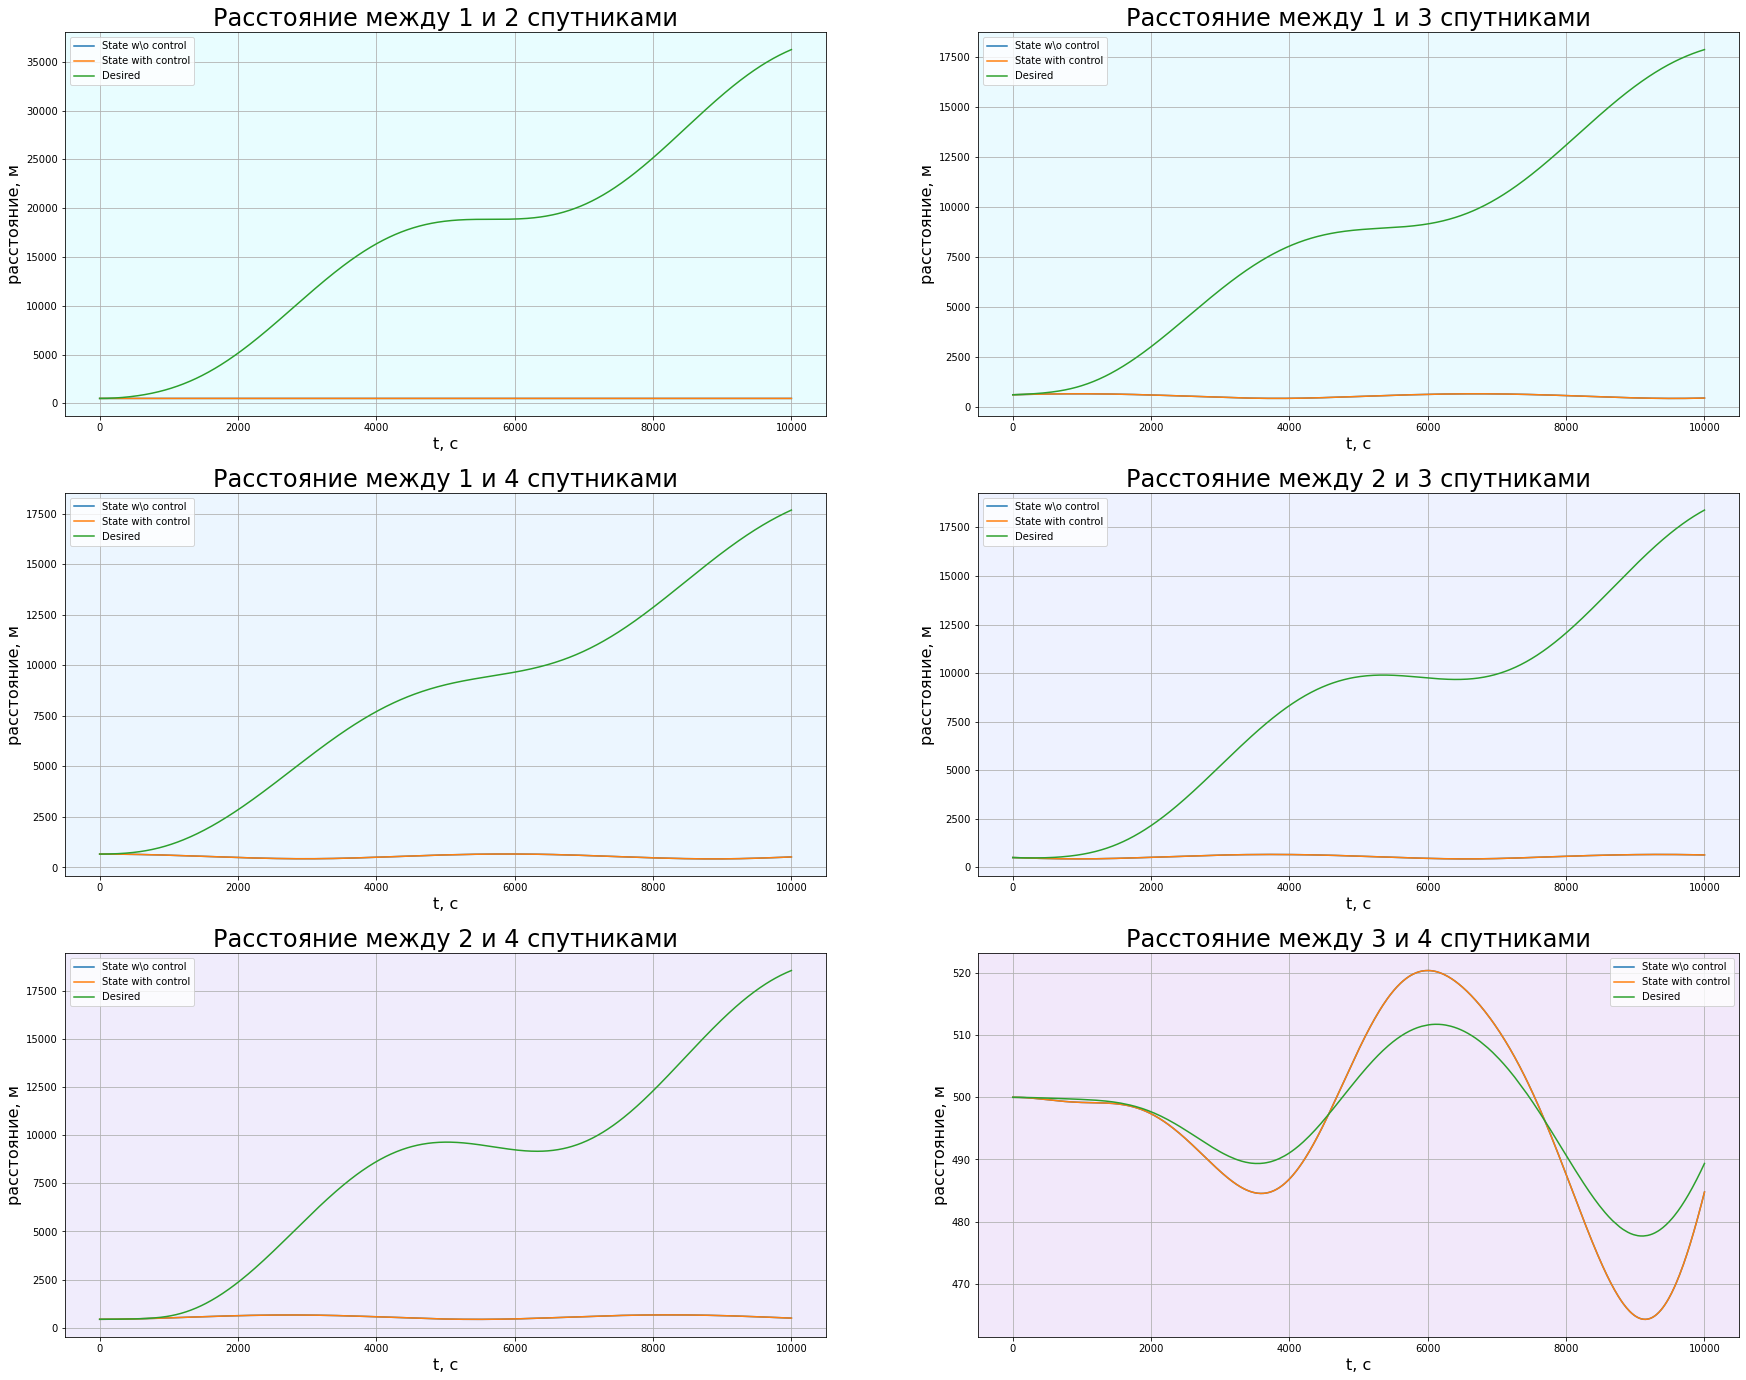

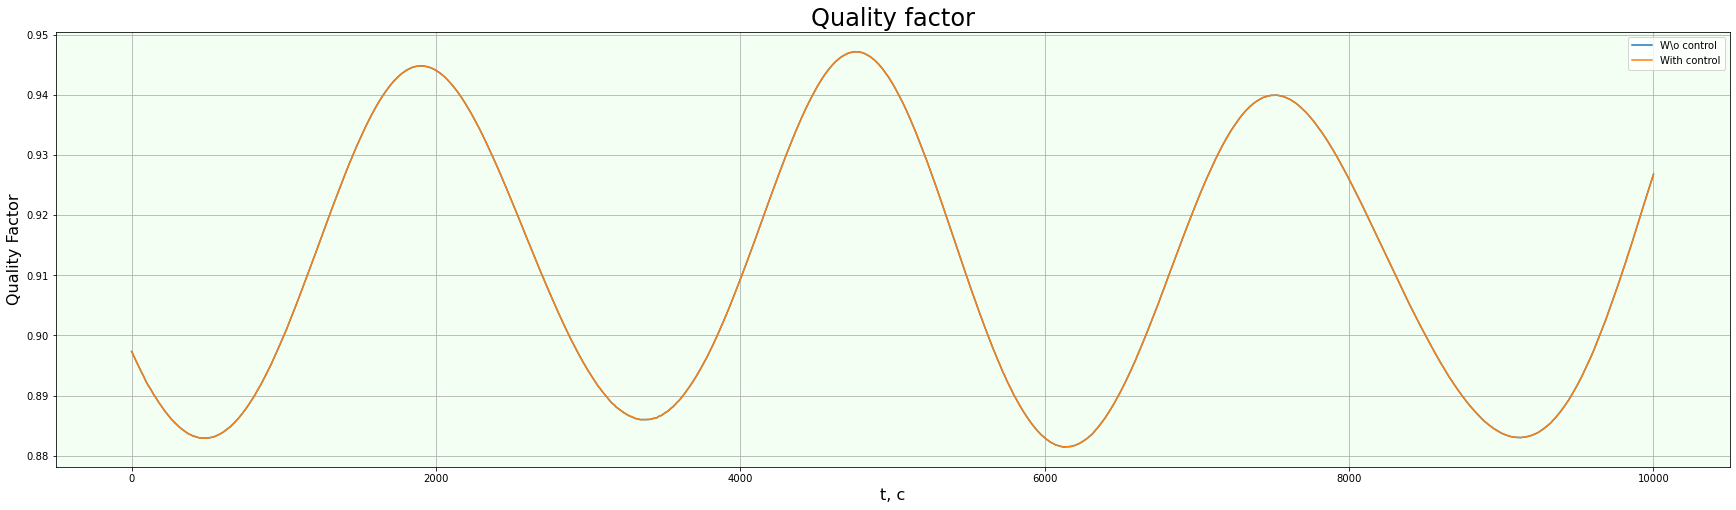

In [81]:
fig, ax = plt.subplots(3, 2, figsize=(30, 24))
ax[0, 0].plot(sol.t, DIB[0, 1], label='State w\o control')
ax[0, 0].plot(sol.t, DIB_u[0, 1], label='State with control')
ax[0, 0].plot(sol.t, DIB_d[0, 1], label='Desired')
ax[0, 0].set_title("Расстояние между 1 и 2 спутниками", fontsize=24)
ax[0, 0].legend()
ax[0, 0].grid()
ax[0, 0].set_facecolor("#E8FDFF")
ax[0, 0].set_xlabel("t, с", size=16)
ax[0, 0].set_ylabel("расстояние, м", size=16)

ax[0, 1].plot(sol.t, DIB[0, 2], label='State w\o control')
ax[0, 1].plot(sol.t, DIB_u[0, 2], label='State with control')
ax[0, 1].plot(sol.t, DIB_d[0, 2], label='Desired')
ax[0, 1].set_title("Расстояние между 1 и 3 спутниками", fontsize=24)
ax[0, 1].legend()
ax[0, 1].grid()
ax[0, 1].set_facecolor("#EAFAFF")
ax[0, 1].set_xlabel("t, с", size=16)
ax[0, 1].set_ylabel("расстояние, м", size=16)

ax[1, 0].plot(sol.t, DIB[0, 3], label='State w\o control')
ax[1, 0].plot(sol.t, DIB_u[0, 3], label='State with control')
ax[1, 0].plot(sol.t, DIB_d[0, 3], label='Desired')
ax[1, 0].set_title("Расстояние между 1 и 4 спутниками", fontsize=24)
ax[1, 0].legend()
ax[1, 0].grid()
ax[1, 0].set_facecolor("#ECF6FF")
ax[1, 0].set_xlabel("t, с", size=16)
ax[1, 0].set_ylabel("расстояние, м", size=16)

ax[1, 1].plot(sol.t, DIB[1, 2], label='State w\o control')
ax[1, 1].plot(sol.t, DIB_u[1, 2], label='State with control')
ax[1, 1].plot(sol.t, DIB_d[1, 2], label='Desired')
ax[1, 1].set_title("Расстояние между 2 и 3 спутниками", fontsize=24)
ax[1, 1].legend()
ax[1, 1].grid()
ax[1, 1].set_facecolor("#EEF2FF")
ax[1, 1].set_xlabel("t, с", size=16)
ax[1, 1].set_ylabel("расстояние, м", size=16)

ax[2, 0].plot(sol.t, DIB[1, 3], label='State w\o control')
ax[2, 0].plot(sol.t, DIB_u[1, 3], label='State with control')
ax[2, 0].plot(sol.t, DIB_d[1, 3], label='Desired')
ax[2, 0].set_title("Расстояние между 2 и 4 спутниками", fontsize=24)
ax[2, 0].legend()
ax[2, 0].grid()
ax[2, 0].set_facecolor("#F0ECFC")
ax[2, 0].set_xlabel("t, с", size=16)
ax[2, 0].set_ylabel("расстояние, м", size=16)

ax[2, 1].plot(sol.t, DIB[2, 3], label='State w\o control')
ax[2, 1].plot(sol.t, DIB_u[2, 3], label='State with control')
ax[2, 1].plot(sol.t, DIB_d[2, 3], label='Desired')
ax[2, 1].set_title("Расстояние между 3 и 4 спутниками", fontsize=24)
ax[2, 1].legend()
ax[2, 1].grid()
ax[2, 1].set_facecolor("#F2E8FA")
ax[2, 1].set_xlabel("t, с", size=16)
ax[2, 1].set_ylabel("расстояние, м", size=16)

# Quality Factor
QF = np.zeros(N)
for i in range(N):
    QF[i] = Quality_Factor(sol.y[0:3, i], sol.y[6:9, i], sol.y[12:15, i], sol.y[18:21, i])
QF_u = np.zeros(N_u)
for i in range(N_u):
    QF_u[i] = Quality_Factor(sol_u.y[0:3, i], sol_u.y[6:9, i], sol_u.y[12:15, i], sol_u.y[18:21, i])

figQ, axQ = plt.subplots(figsize=(30, 8))
axQ.set_title("Quality factor", fontsize=24)
axQ.plot(sol.t, QF, label='W\o control')
axQ.plot(sol_u.t, QF_u, label='With control')
axQ.legend()
axQ.grid()
axQ.set_facecolor("#F2FFF2")
axQ.set_xlabel("t, с", size=16)
axQ.set_ylabel("Quality Factor", size=16)

plt.show()

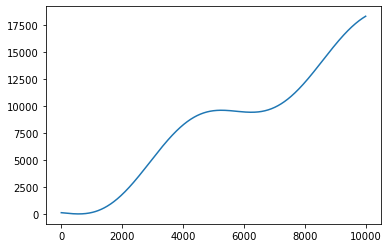

In [102]:
plt.plot(sol.t, xd2(sol.t)[1])